# Setup

In [10]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  Fraud-Detection  LICENSE	README.md


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_ii = pd.read_csv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Variant II.csv/fifar_variant_II.csv")
df_base = pd.read_csv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Raw/Base.csv/Base.csv")
df_iv = pd.read_csv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Raw/Variant IV.csv/Variant IV.csv")

In [14]:
gmm_labels_base = np.load("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/gmm_labels_base.npy")
gmm_labels_iv = np.load("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/gmm_labels_variantiv.npy")
gmm_labels_ii = np.load("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/gmm_labels_variantii.npy")

In [15]:
df_ii['gmm_cluster'] = gmm_labels_ii
df_base['gmm_cluster'] = gmm_labels_base
df_iv['gmm_cluster'] = gmm_labels_iv

In [16]:
def summarize_fraud(df, variant_name):
    fraud_summary = df.groupby('gmm_cluster')['fraud_bool'].agg(['mean', 'sum', 'count'])
    fraud_summary.columns = ['fraud_rate', 'fraud_count', 'cluster_size']
    fraud_summary['variant'] = variant_name
    fraud_summary['cluster'] = fraud_summary.index
    return fraud_summary.reset_index(drop=True)

In [17]:
sum_ii = summarize_fraud(df_ii, 'Variant II')
sum_base = summarize_fraud(df_base, 'Base')
sum_iv = summarize_fraud(df_iv, 'Variant IV')

In [18]:
summary_all = pd.concat([sum_ii, sum_base, sum_iv], axis=0)
summary_all = summary_all[['variant', 'cluster', 'fraud_rate', 'fraud_count', 'cluster_size']]

# Comparison

In [19]:
print("\nFraud Summary by GMM Cluster Across All Variants:\n")
display(summary_all.sort_values(by=['variant', 'fraud_rate'], ascending=[True, False]))


Fraud Summary by GMM Cluster Across All Variants:



,variant,cluster,fraud_rate,fraud_count,cluster_size
0,Base,0,0.020757,1137,54778
2,Base,2,0.020119,1517,75402
1,Base,1,0.009628,8375,869820
2,Variant II,2,0.022511,760,33761
0,Variant II,0,0.013904,2227,160167
1,Variant II,1,0.009977,8042,806072
0,Variant IV,0,0.021439,682,31811
2,Variant IV,2,0.013002,1788,137514
1,Variant IV,1,0.010305,8560,830675


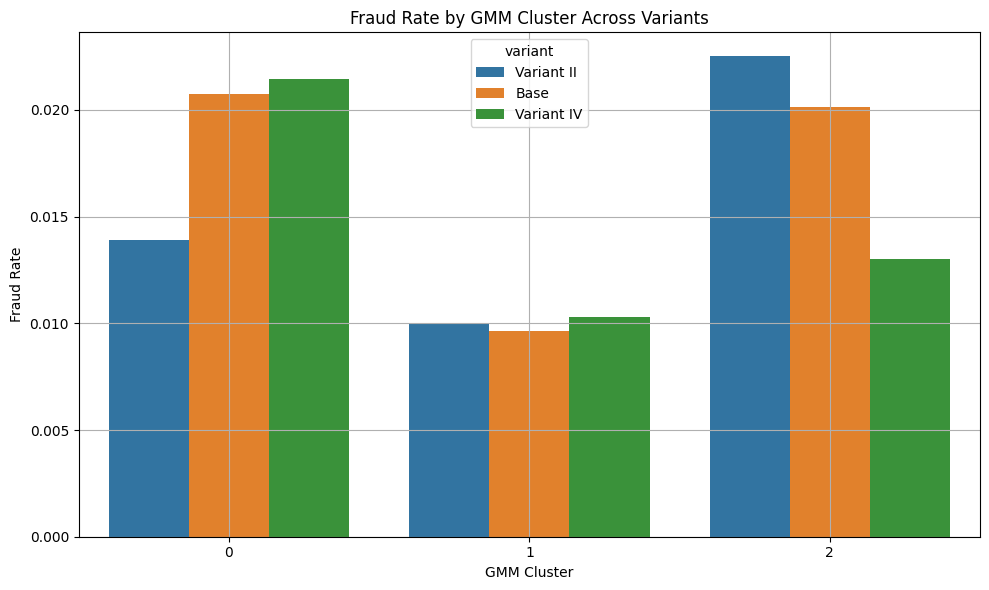

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=summary_all, x='cluster', y='fraud_rate', hue='variant')
plt.title("Fraud Rate by GMM Cluster Across Variants")
plt.ylabel("Fraud Rate")
plt.xlabel("GMM Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()